In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

Name: Heart Disease UCI

Source: Kaggle

https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip/1

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
# read heart_mod.csv file
df = ... 

# Display few rows
...

In [ ]:
# display some statistics about the dataframe
...

In [ ]:
# display info about the dataframe (columns types, number of missing values etc)
...

# Data preparation

In data science it's very important to work with the correct type of data

Let's turn a few variables into categorical variables

In [ ]:
factor_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "target", "thal"]
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

## Missing values

In [ ]:
# count how many missing values there are per column
...

In [ ]:
# Treat the missing values by imputation
# Remember that you should treat numerical and categorical columns differently

for col in numeric_columns:
    ...
    
for col in factor_columns:
    ...
    
# count how many missing values there are per column
...

In [ ]:
# display again statistics about the dataframe to see the effect of the imputation
...

## Outliers treatment

In [ ]:
# display boxplot of any numerical column

for ... in ...:
    ...

In [ ]:
# based on what you see in the boxplots, apply some filters to the numerical columns to get rid of undesirable outliers
# hints: use slicing

...
...
...

In [ ]:
# display boxplot of any numerical column to confirm outliers are gone
for ... in ...:
    ...

Here the dataset was almost clean, we didn't have much to do.
But in general we need to be careful about:
* splitting or merging columns
* date&time caution
* text analytics on free text columns
* feature extraction
* one hot encoding categorical variables
* aggregating levels
* features engineering

The goal of this workshop is to focus on the ML part without bothering you with data manipulation details.

Note however that around 75% of a data scientist time is to collect, join and clean the data !!!

# EDA

Before jumping to the machine learning part, let's visualize our dataset first

Feel free to use either matplotlib or seaborn, as you prefer :)

## Univariate analysis

In [ ]:
# Display histograms of numerical columns
for ... in ...:
    ...

In [ ]:
# Display barplots of counts for each levels in categorical columns
# hint: you can use the .value_count method to count the levels in a pandas Series or countplot of sns
for ... in ...:
    ...

## Bivariate analysis

In [ ]:
target = "target"

In [ ]:
# Create scatterplot or regression plot of any combination of numerical columns
# hint: for regression plot you can use regplot from seaborn

for ... in numeric_columns:
    for ... in numeric_columns:
        ...

# Unsupervised Learning

## Clustering - KMeans

The goal with this first exercise it to see if the data could be grouped in some way.

Since this is an unsupervised task, there is no need to define a training and test set

Let's start by visualizing the data points

In [ ]:
# Display scatter plots of combinations of numeric features as before but this time color the points by their target value

for ... in numeric_columns:
    for ... in numeric_columns:
            ...

In [ ]:
df.head()

### First trial

In [ ]:
# Run this cell without modifying it
y = df["target"].copy()
X = df.drop(["target"], axis=1)
print(X.head())
feature_list = list(X.columns)

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# Import Kmeans from sklearn
from sklearn.... import ...

# Instantiate a KMeans with the number of clusters you want and fit it to the data
model = ...

# get the centroids and put them in a dataframe with nice columns names
centroids = ...
centroids = ...

# get the clusters of each points
clusters = ...

# create a scatter plot of chol VS age with points colored according to the cluster they belong to 
# Also display the centroids
...
plt.show()

In [ ]:
# create a scatter plot of any numerical column combination with points colored according to the cluster they belong to 
for col in numeric_columns:
    for col2 in numeric_columns:
        if col < col2:
            plt.scatter(X[col], X[col2], c= clusters, s=50, alpha=0.6)
            plt.scatter(centroids.loc[:, col], centroids.loc[:, col2], c='red', s=100, marker="+", label="centroids")
            plt.xlabel(col)
            plt.ylabel(col2)
            plt.legend()
            plt.show()

Let's evaluate the clusters

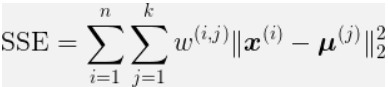

In [ ]:
# Compute the inertia of our clustering model either via the model attributes or by computing it manually
...

Optimisation: let's find the best number of clusters

In [ ]:
# Create a loop to try several number of clusters and compute in each case the inertia

intertias = []

for i in ...:
    
    ...
    ...
    intertias.append(...) #append inertias to the list

# now plot the inertia as a function of the number of clusters
...
plt.show()

Thanks to this plot you should now be able to choose the best number of clusters. 

In our case we already know that our target only has 2 possible values. So let's generate a KMeans with 2 clusters and let's see if they correspond to the real groups

In [ ]:
# Create KMeans model with 2 clusters
model = KMeans(n_clusters=...).fit(...)


# get the centroids and put them in a dataframe with nice columns names
centroids = ...
centroids = ...

# get the clusters of each points
clusters = ...

# create a scatter plot of chol VS age with points colored according to the cluster they belong to 
# Also display the centroids
...
plt.show()

# create a scatter plot of chol VS age with points colored according to the target and compare the two figures
...
plt.show()


It seems like with the clustering we didn't manage to capture the benign/malign status of the tumor. 

Let's try differently

### Second trial

If we look at the data, we can see that they are not on the same scale, so we need to standardize before in order not to bias the distance computations

hint: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# import standard scaler from sklearn
from sklearn.... import ...

# Instantiate a scaler object
sc = ...

# Apply the scaler to the data and turn it into a nice dataframe with the same column names as before
X_scaled = ...

X_scaled.columns = ...
X_scaled.head()


Let's try again to run a KMeans model with 2 clusters

In [ ]:
# Create KMeans model with 2 clusters
model = KMeans(n_clusters=...).fit(...)


# get the centroids and put them in a dataframe with nice columns names
centroids = ...
centroids = ...

# get the clusters of each points
clusters = ...

# create a scatter plot of chol VS age with points colored according to the cluster they belong to 
# Also display the centroids
...
plt.show()

# create a scatter plot of chol VS age with points colored according to the target and compare the two figures
...
plt.show()


This looks much better now. 
Let's compute some similarity matrix

## Hierarchical clustering (Optional)

In [ ]:
# Import hierarchical clustering libraries from scipy and sklearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.show()

# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X_scaled)

print(hc.n_clusters)

## Principal Component Analysis

hint: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Import PCA from sklearn
from sklearn..... import ...
pca = ...()

# Fit the data to the pca
...

# Plot the proportion of variance explained (attribute of the pca) on the y-axis of the bar plot
...
plt.show()


In [ ]:
# Reduce the dimensions of our initial data to 5 features using PCA
pca = ...
X_pca = ...

# turn the array into a dataframe with column names PC1, PC2 etc
principalDf = pd.DataFrame(data = ...
             , columns = ...)

finalDf = pd.concat([principalDf, y], axis = 1)

In [ ]:
finalDf.head()

# Congratulations

You made it to the end of the first part of this ML training ! :)

If you still have time, feel free to experiment on what you have learned

# Going further

Here is a list of topic you could be interested in if you want to go further in unsupervised learning

* DBScan 
* t-SNE 
* text analytics (word embeddings)
* anomaly detection 
